# Rayos X

## Proyecciones

#### Pregunta 1

Un cuadrado de 5x5 casilleros se rellena con números del 1 al 25, comenzando arriba a la izquierda y terminando abajo a la derecha. Encuentre la proyección para θ=45°. Asuma que la línea de proyección central cruza por el píxel central del cuadrado.

### Pregunta 2

Considere el circulo unitario dado por

$$f(x, y)=\left\{\begin{array}{ll}1 & x^{2}+y^{2} \leq 1 \\ 0 & x^{2}+y^{2}>1\end{array}\right\}$$

¿Cuál es su proyección para $\theta=0$?

### Pregunta 3

Considere el objeto de la siguiente figura, el
cual corresponde a un triangulo equilátero centrado en el origen, de lado a y tiene un lado paralelo al eje x. Considere que el objeto tiene un coeficiente lineal de atenuación u = 1, y a =6.

![download (1).png](<attachment:download (1).png>)
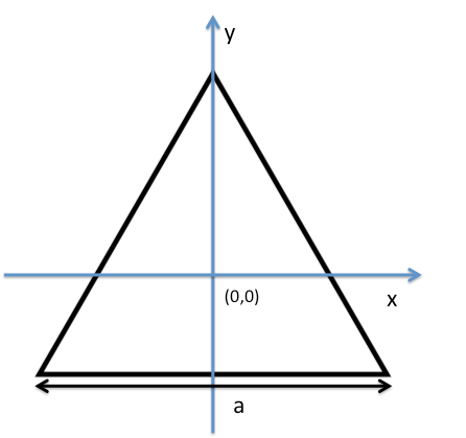

### Pregunta 4

Calcule matemáticamente la transformada de radón del objeto mostrado en la siguiente figura:

![Screenshot 2023-09-15 at 09.21.09.png](<attachment:Screenshot 2023-09-15 at 09.21.09.png>)
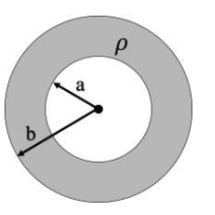

## Simulación rayos X

Simule atenuación de rayos X con una fuente puntual en infinito 


In [2]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# for numerical integration
import scipy.integrate as scint

### Dominio

In [3]:
num_x = 2048
px = np.linspace(-1, 0, num_x)
py = np.linspace(-1/2, +1/2, num_x)
[ mx, my ] = np.meshgrid(px, py)

### Objetos

In [4]:
circulo = lambda x, y : np.where( np.abs(x + 0.5) ** 2 + np.abs(y) ** 2 <= 0.1 ** 2, 1.0, 0.0)

### Integral de línea

In [5]:
# this integrates along segments
def integrate_segment_2d(f, xs, xe):
    return np.linalg.norm(xs - xe) * scint.quad(lambda s : f(xs[0] + s * (xe[0] - xs[0]), xs[1] + s * (xe[1] - xs[1])), 0.0, 1.0, complex_func=False)[0]

### Transformación coordenadas a índices

In [6]:
def coord_to_index(x):
    return np.array([ -(num_x - 1) * (-1 - x[0]) , num_x * (x[1]  - py.min()) / (py.max() - py.min()) ])

def x_coord_to_index(x):
    if isinstance(x, list):
        x = np.array(x)
    return (num_x - 1) * (1.0 + x)

def y_coord_to_index(y):
    if isinstance(y, list):
        y = np.array(y)
    return num_x * (y  - py.min()) / (py.max() - py.min())

### Gráficos

/var/folders/jm/qkslqjg102d5tzd_s4qjyg040000gn/T/ipykernel_5343/2177843236.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.linalg.norm(xs - xe) * scint.quad(lambda s : f(xs[0] + s * (xe[0] - xs[0]), xs[1] + s * (xe[1] - xs[1])), 0.0, 1.0, complex_func=False)[0]


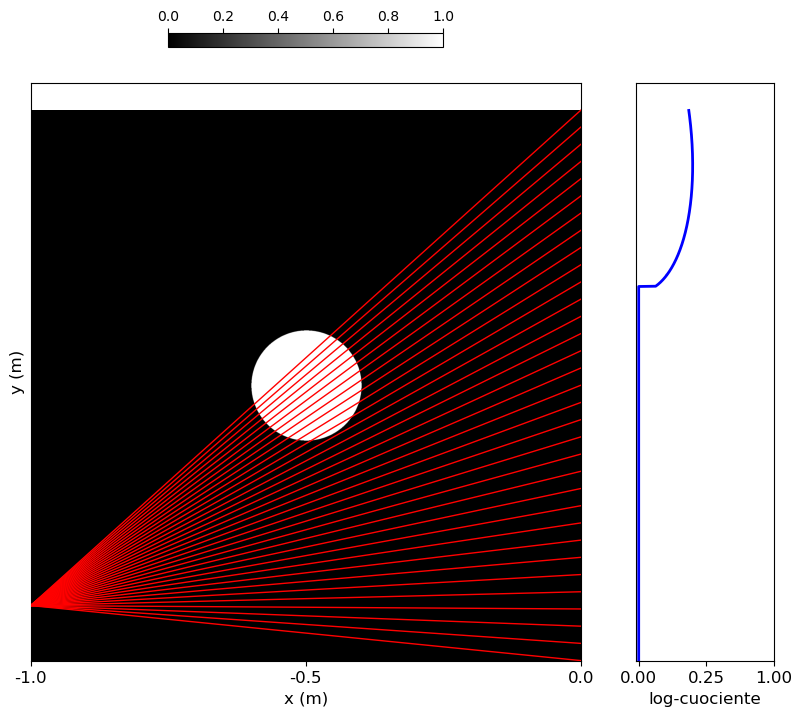

In [8]:
f = circulo
#xs,xe = ( np.array([ [-1.0, _y] for _y in py]), np.array([ [0.0, _y] for _y in py]))
xs,xe = ( np.array([ [-1.0, -0.4] for _y in py]), np.array([ [0.0, _y] for _y in py]))
Rf = np.array([ integrate_segment_2d(f, xs[i], xe[i]) for i in range(xs.shape[0])])

# indices for plotting ticks
pidx = [ I * num_x // 2 for I in range(2) ] + [ num_x - 1 ]
# indices for plotting paths
N_rays = 32 # número de rayos a visualizar
ridx = [ I * num_x // N_rays for I in range(N_rays) ] + [ num_x - 1 ]

# DENSITY AND XRAY
#   Taken from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
fig = plt.figure(figsize=(8, 8), layout='constrained')
ax = fig.add_gridspec(top=1.00, right=0.75).subplots()
ax.set(aspect=1)
ax_side = ax.inset_axes([1.1, 0, 0.25, 1], sharey=ax)

ax_im = ax.imshow(f(mx, my), origin='lower', vmin=0.0, cmap='gray')
for I in ridx:
    ax.plot((x_coord_to_index(xs[I][0]),x_coord_to_index(xe[I][0])), (y_coord_to_index(xs[I][1]),y_coord_to_index(xe[I][1])), color='r', linewidth=1, zorder=+5)
ax.set_xticks(pidx, labels=[ '{:.1f}'.format(_x) for _x in px[pidx] ], fontsize=12)
ax.set_yticks(pidx, labels=[ '{:.1f}'.format(_y) for _y in py[pidx] ], fontsize=12)
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
plt.colorbar(ax_im, shrink=0.5, orientation='horizontal', ticklocation='top', location='top')

ax_side.plot(Rf, range(num_x), color='b', linewidth=2)
ax_side.set_yticks([])
ax_side.set_xticks(ticks=[0.00, 0.25, 0.50], labels=[ '0.00', '0.25', '1.00' ], fontsize=12)
ax_side.set_xlabel('log-cuociente', fontsize=12)

plt.show()